Name : Palak Bang
     Roll. No. : 08(A1)
     Mini Project Practical 09

# CNN for Anomaly Detection (on HAR dataset)

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import seaborn as sns

In [26]:
import numpy as np

X_train = np.loadtxt("X_train.txt")
y_train = np.loadtxt("y_train.txt").astype(int).ravel()
subject_train = np.loadtxt("subject_train.txt").astype(int).ravel()

X_test = np.loadtxt("X_test.txt")
y_test = np.loadtxt("y_test.txt").astype(int).ravel()
subject_test = np.loadtxt("subject_test.txt").astype(int).ravel()

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("subject_train shape:", subject_train.shape)

X_train shape: (7352, 561)
y_train shape: (7352,)
subject_train shape: (7352,)


In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
y_train_binary = (y_train != 1).astype(int)
y_test_binary = (y_test != 1).astype(int)


In [11]:
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [13]:
model = Sequential([
    Conv1D(64, kernel_size=5, activation='relu', input_shape=(561, 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),
    Conv1D(32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary output
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
history = model.fit(
    X_train_cnn, y_train_binary,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.8692 - loss: 0.2609 - val_accuracy: 0.9871 - val_loss: 0.0530
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.9695 - loss: 0.0795 - val_accuracy: 0.9959 - val_loss: 0.0250
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - accuracy: 0.9803 - loss: 0.0505 - val_accuracy: 0.9966 - val_loss: 0.0169
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.9860 - loss: 0.0368 - val_accuracy: 0.9973 - val_loss: 0.0161
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.9878 - loss: 0.0355 - val_accuracy: 0.9980 - val_loss: 0.0141
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.9911 - loss: 0.0274 - val_accuracy: 0.9966 - val_loss: 0.0124
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 0.9893 - loss: 0.0259 - val_accuracy: 0.9980 - val_loss: 0.0074
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.9939 - loss: 0.0193 - val_accuracy: 0.9980 -


--- CNN Model Evaluation ---
Test Accuracy: 0.9912
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       496
           1       0.99      1.00      0.99      2451

    accuracy                           0.99      2947
   macro avg       0.99      0.98      0.98      2947
weighted avg       0.99      0.99      0.99      2947



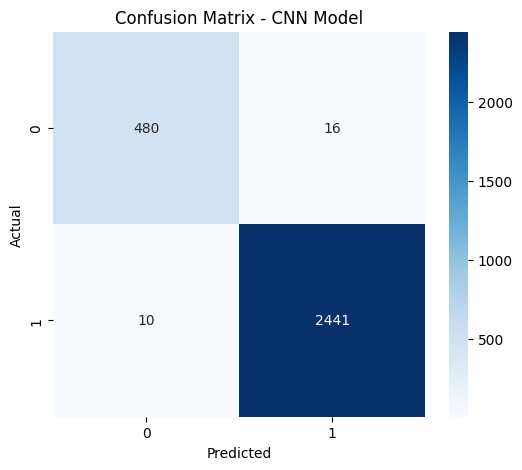

In [15]:
print("\n--- CNN Model Evaluation ---")
loss, accuracy = model.evaluate(X_test_cnn, y_test_binary, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")

y_pred = (model.predict(X_test_cnn) > 0.5).astype(int)
print(classification_report(y_test_binary, y_pred))


import seaborn as sns

cm = confusion_matrix(y_test_binary, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CNN Model")
plt.show()

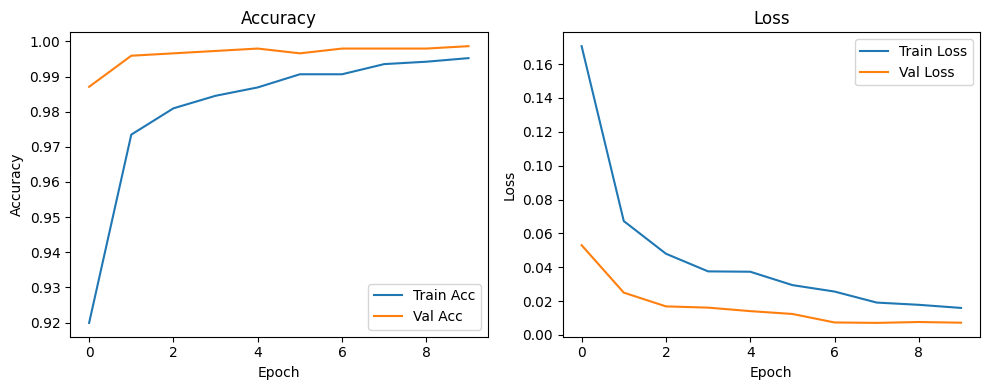

In [16]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Multi-Class CNN Model using UCI HAR Dataset

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train_cat = to_categorical(y_train - 1)
y_test_cat = to_categorical(y_test - 1)

X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [21]:
model = Sequential([
    Conv1D(64, kernel_size=5, activation='relu', input_shape=(561, 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),
    Conv1D(32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(y_train_cat.shape[1], activation='softmax')  # Multi-class output
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
history = model.fit(
    X_train_cnn, y_train_cat,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 13s 107ms/step - accuracy: 0.5597 - loss: 1.0271 - val_accuracy: 0.9041 - val_loss: 0.2965
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 12s 133ms/step - accuracy: 0.8366 - loss: 0.3905 - val_accuracy: 0.9347 - val_loss: 0.1845
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 24s 171ms/step - accuracy: 0.8960 - loss: 0.2588 - val_accuracy: 0.9402 - val_loss: 0.1575
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.9136 - loss: 0.2064 - val_accuracy: 0.9334 - val_loss: 0.1594
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - accuracy: 0.9249 - loss: 0.1817 - val_accuracy: 0.9334 - val_loss: 0.1628
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.9310 - loss: 0.1781 - val_accuracy: 0.9415 - val_loss: 0.1361
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.9465 - loss: 0.1405 - val_accuracy: 0.9409 - val_loss: 0.1362
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 80ms/step - accuracy: 0.9434 - loss: 0.1397 - val_accuracy: 0.9


--- CNN Model Evaluation (Multi-Class) ---
Test Accuracy: 0.9338
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step
              precision    recall  f1-score   support

           1       0.94      0.98      0.96       496
           2       0.98      0.92      0.95       471
           3       0.95      0.97      0.96       420
           4       0.94      0.78      0.85       491
           5       0.83      0.95      0.89       532
           6       0.99      1.00      0.99       537

    accuracy                           0.93      2947
   macro avg       0.94      0.93      0.93      2947
weighted avg       0.94      0.93      0.93      2947



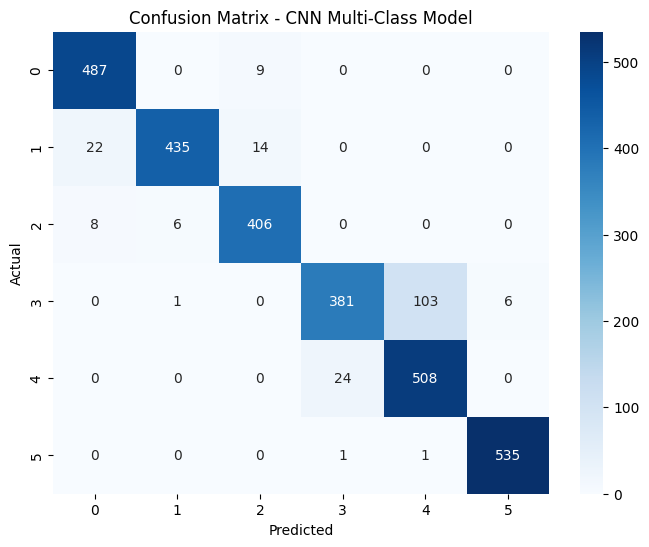

In [24]:
print("\n--- CNN Model Evaluation (Multi-Class) ---")
loss, accuracy = model.evaluate(X_test_cnn, y_test_cat, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")

y_pred_prob = model.predict(X_test_cnn)
y_pred = np.argmax(y_pred_prob, axis=1) + 1

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CNN Multi-Class Model")
plt.show()

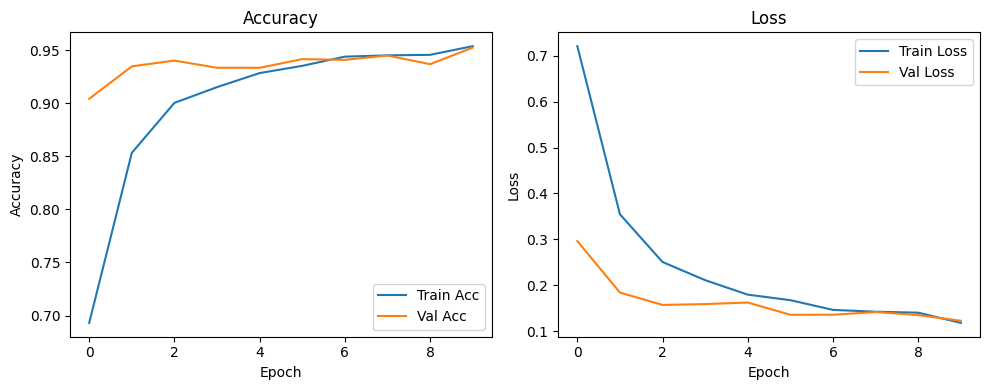

In [25]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Multi-Class LSTM Model using UCI HAR Dataset

In [29]:
X_train_lstm = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_lstm = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [30]:
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(561, 1)),
    Dropout(0.5),
    LSTM(64),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(y_train_cat.shape[1], activation='softmax')  # Multi-class output
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
history = model.fit(
    X_train_lstm, y_train_cat,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 195s 2s/step - accuracy: 0.2509 - loss: 1.6263 - val_accuracy: 0.3549 - val_loss: 1.1207
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 183s 2s/step - accuracy: 0.2264 - loss: 1.8564 - val_accuracy: 0.1557 - val_loss: 1.8170
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 169s 2s/step - accuracy: 0.1836 - loss: 1.7868 - val_accuracy: 0.1557 - val_loss: 1.8278
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 168s 2s/step - accuracy: 0.2163 - loss: 1.7415 - val_accuracy: 0.2277 - val_loss: 1.7095
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 205s 2s/step - accuracy: 0.2974 - loss: 1.5275 - val_accuracy: 0.3583 - val_loss: 1.1207
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.3504 - loss: 1.1818 - val_accuracy: 0.4446 - val_loss: 1.0754
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.4087 - loss: 1.1104 - val_accuracy: 0.4494 - val_loss: 1.0313
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 198s 2s/step - accuracy: 0.4415 - loss: 1.0724 - val_accuracy: 0.4997 - v


--- LSTM Model Evaluation (Multi-Class) ---
Test Accuracy: 0.5280
93/93 ━━━━━━━━━━━━━━━━━━━━ 32s 335ms/step
              precision    recall  f1-score   support

           1       0.63      0.89      0.74       496
           2       0.79      0.51      0.62       471
           3       0.50      0.47      0.48       420
           4       0.00      0.00      0.00       491
           5       0.37      0.73      0.49       532
           6       0.59      0.54      0.57       537

    accuracy                           0.53      2947
   macro avg       0.48      0.52      0.48      2947
weighted avg       0.48      0.53      0.48      2947



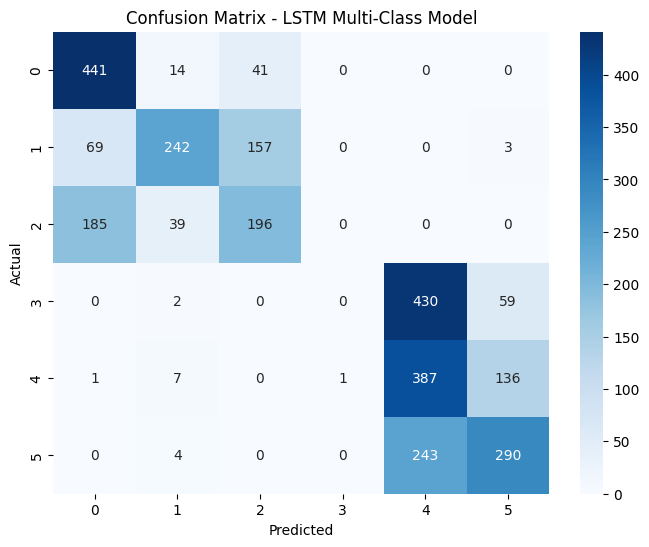

In [32]:
print("\n--- LSTM Model Evaluation (Multi-Class) ---")
loss, accuracy = model.evaluate(X_test_lstm, y_test_cat, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")

y_pred_prob = model.predict(X_test_lstm)
y_pred = np.argmax(y_pred_prob, axis=1) + 1

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LSTM Multi-Class Model")
plt.show()

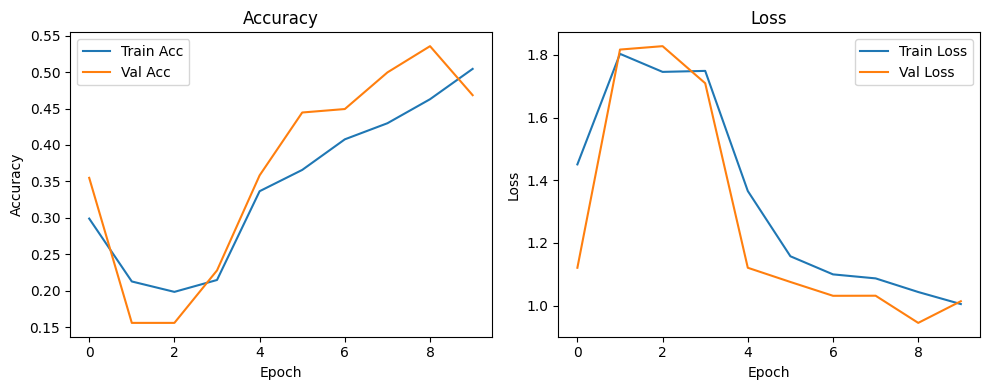

In [33]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()